# Comparativo pra múltiplas seeds

In [1]:
# varre as pastas de teste e plota o gráfico de scatter de múltiplas runs
import matplotlib.pyplot as plt
import moviepy.editor as mpy
import pandas as pd
import numpy as np
import os

def plot_mi(dir: str):
    lista = [['train/mutual_info_0','train/mutual_info_10', 'darkorange'],
            ['train/mutual_info_1','train/mutual_info_11', 'b']]
    data = []
    path_plot = os.path.join(dir, 'plots')
    if not os.path.exists(path_plot):
        os.makedirs(path_plot)

    pastas = [i for i in os.listdir(f'{dir}')]
    for indice in pastas:
        if indice.isdecimal():
            direc = f'{dir}/{indice}/'
            data.append(pd.read_csv(direc + 'resultados.csv'))


    for j in range(len(data[0])):
        for k in range(len(data)):
            for exemplo in lista:
                plt.scatter(x= data[k][exemplo[0]][j],y= data[k][exemplo[1]][j], c = exemplo[2])

        min_y = min([i[[lista[0][1], lista[1][1]]].min().min() for i in data])
        max_y = max([i[[lista[0][1], lista[1][1]]].max().max() for i in data])
        margin_y = 0.1 * (max_y - min_y)

        min_x = min([i[[lista[0][0], lista[1][0]]].min().min() for i in data])
        max_x = max([i[[lista[0][0], lista[1][0]]].max().max() for i in data])
        margin_x = 0.1 * (max_x - min_x)

        plt.xlabel('I(X, T)')
        plt.ylabel('I(T, Y)')
        plt.legend(['1st layer', '2nd layer'])
        plt.ylim(min_y - margin_y, max_y + margin_y)
        plt.xlim(min_x - margin_x, max_x + margin_x)
        
        plt.title(f'Iteration {str(j).zfill(3)}')
        plt.tight_layout()
        plt.savefig(f'{path_plot}/plot_{str(j).zfill(3)}.jpg')
        plt.clf()

    filenames = [f'{path_plot}/' + i for i in os.listdir(f'{path_plot}')]
    clip = mpy.ImageSequenceClip(filenames, fps=15)
    clip.write_videofile(f'{dir}/' + f"IP_evo_{indice}.mp4", logger = None)

KeyError: 3

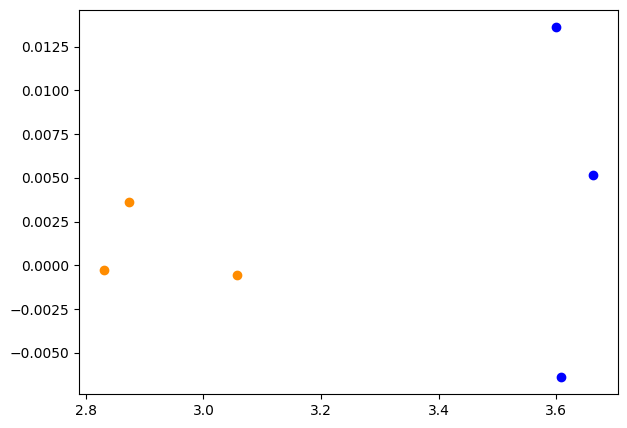

In [ ]:
from utils import Experimento, alerta

params = {
    'env_id': 'CartPole-v1',
    'n_envs': 1,
    'fib_seeds': [0],
    'timesteps': int(1e5),
    'recording': False,
    'device': 'cpu',
    'reference_agent': 'agente_treinado.zip',
    'coleta': False
}

for i in range(50):
    params['fib_seeds'] = [i]
    teste = Experimento(params)
    teste.treinamento()
plot_mi('experimento')
alerta()